<h2><a href="https://leetcode.com/problems/find-k-closest-elements/?envType=study-plan-v2&envId=binary-search">658. Find K Closest Elements</a></h2><h3>Medium</h3><hr><p>Given a <strong>sorted</strong> integer array <code>arr</code>, two integers <code>k</code> and <code>x</code>, return the <code>k</code> closest integers to <code>x</code> in the array. The result should also be sorted in ascending order.</p>

<p>An integer <code>a</code> is closer to <code>x</code> than an integer <code>b</code> if:</p>

<ul>
	<li><code>|a - x| &lt; |b - x|</code>, or</li>
	<li><code>|a - x| == |b - x|</code> and <code>a &lt; b</code></li>
</ul>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<pre><strong>Input:</strong> arr = [1,2,3,4,5], k = 4, x = 3
<strong>Output:</strong> [1,2,3,4]
</pre><p><strong class="example">Example 2:</strong></p>
<pre><strong>Input:</strong> arr = [1,2,3,4,5], k = 4, x = -1
<strong>Output:</strong> [1,2,3,4]
</pre>
<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= k &lt;= arr.length</code></li>
	<li><code>1 &lt;= arr.length &lt;= 10<sup>4</sup></code></li>
	<li><code>arr</code> is sorted in <strong>ascending</strong> order.</li>
	<li><code>-10<sup>4</sup> &lt;= arr[i], x &lt;= 10<sup>4</sup></code></li>
</ul>


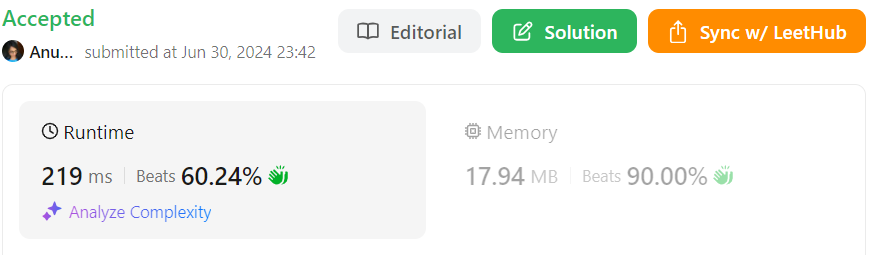

In [1]:
from collections import deque
from typing import List

class Solution:
    def findClosestElements(self, arr: List[int], k: int, x: int) -> List[int]:
        # find index closest to x
        n = len(arr)
        index = self.binary_search(arr, x)
        
        # start = index - 1 if index != 0 else index
        start = index
        end = index  + 1

        res = deque()
        for i in range(k):
            if start >= 0 and end < len(arr):
                diff1 = abs(x - arr[start])
                diff2 = abs(x - arr[end])

                if diff1 <= diff2 :
                    res.appendleft(arr[start])
                    start -= 1
                else:
                    res.append(arr[end])
                    end += 1
            elif start >= 0:
                res.appendleft(arr[start])
                start -= 1
            elif end < n:
                res.append(arr[end])
                end  += 1

        return res

    def binary_search(self, arr, x):
        start, end = 0, len(arr) - 1

        while start <= end:
            mid = start + (end - start)//2

            if arr[mid] == x:
                return mid
            if arr[mid] < x:
                start = mid +1 
            else:
                 end  = mid -1 
        return end